In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [67]:
fact_segment = pd.read_csv('./data/tables/factSegment.csv').drop(columns=['Unnamed: 0'], axis=1)
fact_segment.head()

,customer_id,city,country,active,full_name,rental_id,amount,rental_date,first_date,recency,monetary,frequency
0,1,Sasebo,Japan,1,MARY SMITH,1422,0.99,2005-06-15,2005-05-24,90,118.68,32
1,1,Sasebo,Japan,1,MARY SMITH,1476,9.99,2005-06-15,2005-05-24,90,118.68,32
2,1,Sasebo,Japan,1,MARY SMITH,1725,4.99,2005-06-16,2005-05-24,90,118.68,32
3,1,Sasebo,Japan,1,MARY SMITH,2308,4.99,2005-06-18,2005-05-24,90,118.68,32
4,1,Sasebo,Japan,1,MARY SMITH,2363,0.99,2005-06-18,2005-05-24,90,118.68,32


## **Khám phá dữ liệu được tổng hợp**

In [68]:
fact_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  16044 non-null  int64  
 1   city         16044 non-null  object 
 2   country      16044 non-null  object 
 3   active       16044 non-null  int64  
 4   full_name    16044 non-null  object 
 5   rental_id    16044 non-null  int64  
 6   amount       16044 non-null  float64
 7   rental_date  16044 non-null  object 
 8   first_date   16044 non-null  object 
 9   recency      16044 non-null  int64  
 10  monetary     16044 non-null  float64
 11  frequency    16044 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.5+ MB


In [69]:
fact_segment.duplicated().sum()

0

In [70]:
fact_segment.isna().sum()

customer_id    0
city           0
country        0
active         0
full_name      0
rental_id      0
amount         0
rental_date    0
first_date     0
recency        0
monetary       0
frequency      0
dtype: int64

In [71]:
fact_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  16044 non-null  int64  
 1   city         16044 non-null  object 
 2   country      16044 non-null  object 
 3   active       16044 non-null  int64  
 4   full_name    16044 non-null  object 
 5   rental_id    16044 non-null  int64  
 6   amount       16044 non-null  float64
 7   rental_date  16044 non-null  object 
 8   first_date   16044 non-null  object 
 9   recency      16044 non-null  int64  
 10  monetary     16044 non-null  float64
 11  frequency    16044 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.5+ MB


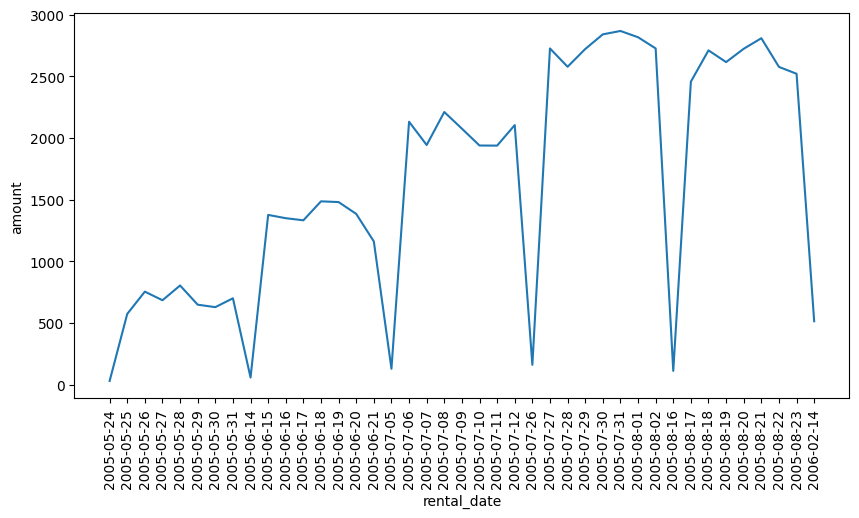

In [88]:
revenue_date = fact_segment.groupby('rental_date')['amount'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=revenue_date['rental_date'], y=revenue_date['amount'])
plt.xticks(rotation=90)
plt.show()

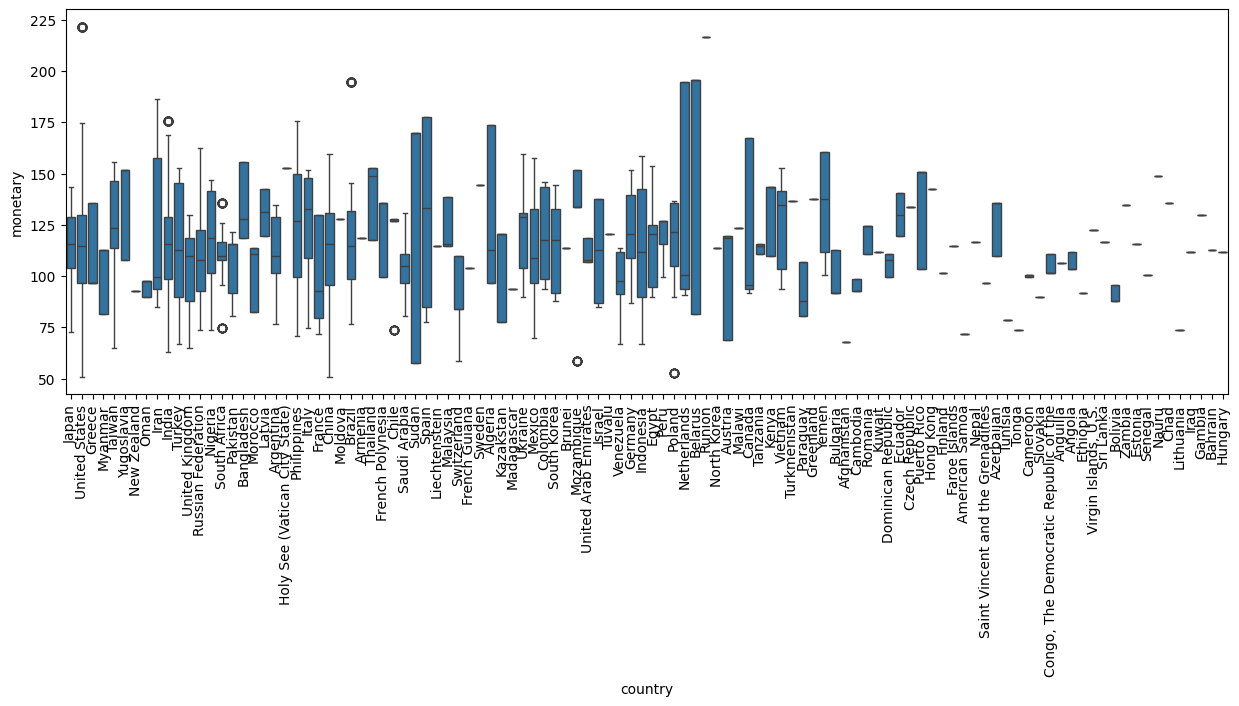

In [97]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=fact_segment, y='monetary', x='country', legend=False)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='frequency', ylabel='recency'>

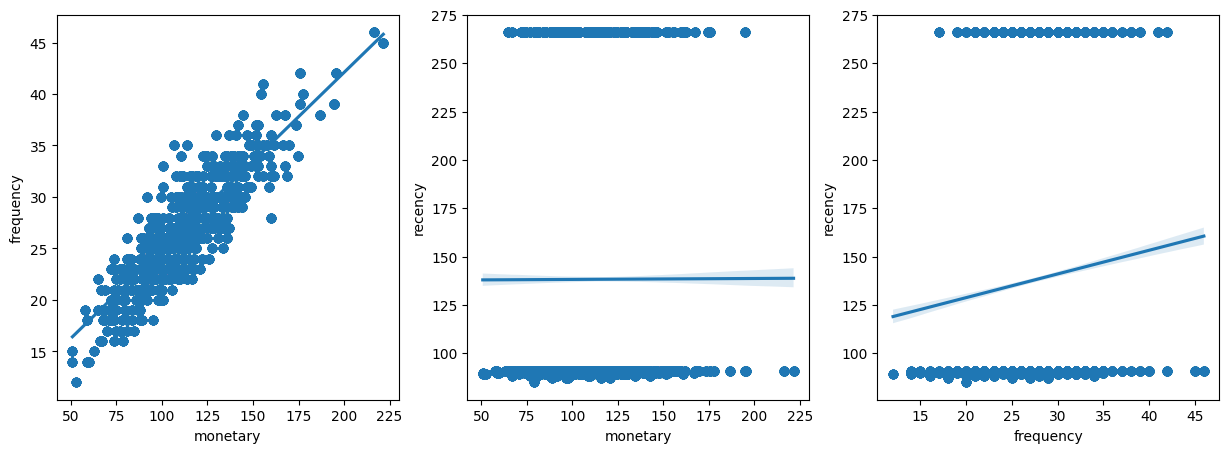

In [105]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.regplot(data=fact_segment, x='monetary', y='frequency', ax=ax[0])
sns.regplot(data=fact_segment, x='monetary', y='recency', ax=ax[1])
sns.regplot(data=fact_segment, x='frequency', y='recency', ax=ax[2])

## **Phân cụm khách hàng**

In [121]:
final_segment = fact_segment[['recency','monetary','frequency']]
final_segment = final_segment.drop_duplicates().reset_index().drop(columns=['index'])

scaler = MinMaxScaler().set_output(transform="pandas")
segment_scale = scaler.fit_transform(final_segment)
segment_scale

,recency,monetary,frequency
0,0.027624,0.397364,0.588235
1,0.033149,0.456239,0.441176
2,0.033149,0.497305,0.411765
3,0.033149,0.181195,0.294118
4,1.000000,0.549326,0.764706
...,...,...,...
532,0.033149,0.391623,0.529412
533,1.000000,0.268717,0.470588
534,1.000000,0.286467,0.382353
535,0.033149,0.192912,0.294118


* Find the optimal clusters for Kmeans

In [122]:
from clusteval import clusteval

In [123]:
# Set parameters, as an example dbscan
ce = clusteval(evaluate='silhouette')

# Fit to find optimal number of clusters using dbscan
results= ce.fit(segment_scale)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [00:00<00:00, 40.71it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [2].
[clusteval] >INFO> Fin.


In [ ]:
plt.figure(figsize=(10,5))
ce.plot()

* Implement clustering by approprate k clusters

In [133]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init='auto', verbose=0).fit(segment_scale)
segmentation = kmeans.predict(segment_scale)

In [134]:
kmeans.cluster_centers_

array([[0.03102917, 0.5711162 , 0.63201094],
       [1.        , 0.39128797, 0.48739496],
       [0.02908923, 0.20252259, 0.25935829],
       [1.        , 0.23414629, 0.33488132],
       [1.        , 0.58406965, 0.6643002 ],
       [0.02999657, 0.37622419, 0.45048189]])

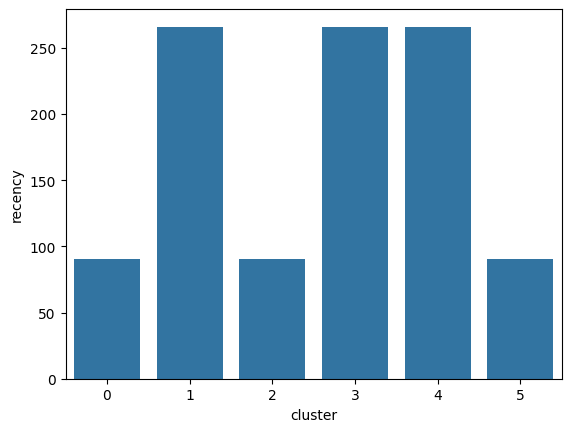

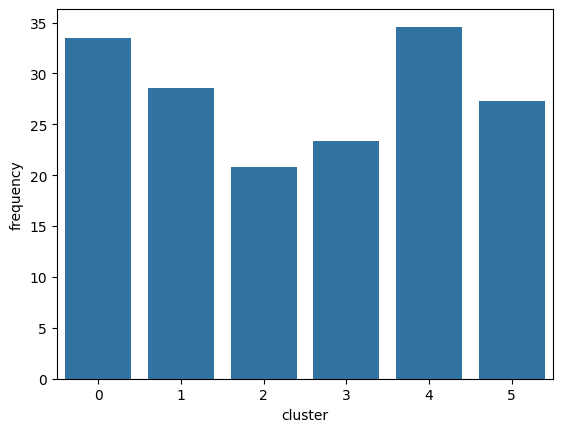

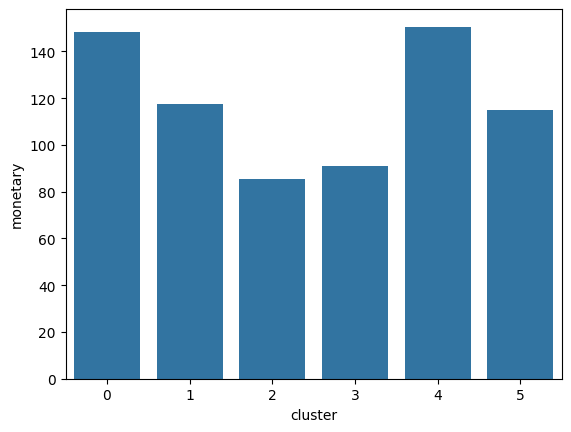

In [135]:
final_segment['cluster'] = segmentation
customer_clusters = final_segment.groupby(['cluster'], as_index=False).mean()

cols = ['recency','frequency','monetary']

for i in cols:
    sns.barplot(data=customer_clusters, x='cluster', y=i)
    plt.show()